Exploratory Data Analysis - Sports
(Level - Advanced)
● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
● As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.
● Suggest teams or players a company should endorse for its products.
● You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel/SAP/SAS)
● Dataset: https://bit.ly/34SRn3b
● Advanced Level - Create storyboards. Screen-record along with your audio
explaining the charts and interpretations. Use annotations, animation and
images.
● Task submission:
1. Create the dashboards and/or storyboard and record it
2. Upload the recording on Youtube, share the link on LinkedIn
3. Submit LinkedIn post link in Task Submission Form when shared
4. Please read FAQs on how to submit the tasks.


In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)



In [2]:
#importing data sets

data1 = pd.read_csv('deliveries.csv')
data2 = pd.read_csv('matches.csv')

In [3]:
data1.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
data2.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [5]:
# EDA of Data1

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
data1.shape

(179078, 21)

In [8]:
data1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [9]:
#Checking for null values in the data set

data1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
round(data1.isnull().sum()/len(data1)*100 , 2)

match_id             0.00
inning               0.00
batting_team         0.00
bowling_team         0.00
over                 0.00
ball                 0.00
batsman              0.00
non_striker          0.00
bowler               0.00
is_super_over        0.00
wide_runs            0.00
bye_runs             0.00
legbye_runs          0.00
noball_runs          0.00
penalty_runs         0.00
batsman_runs         0.00
extra_runs           0.00
total_runs           0.00
player_dismissed    95.07
dismissal_kind      95.07
fielder             96.40
dtype: float64

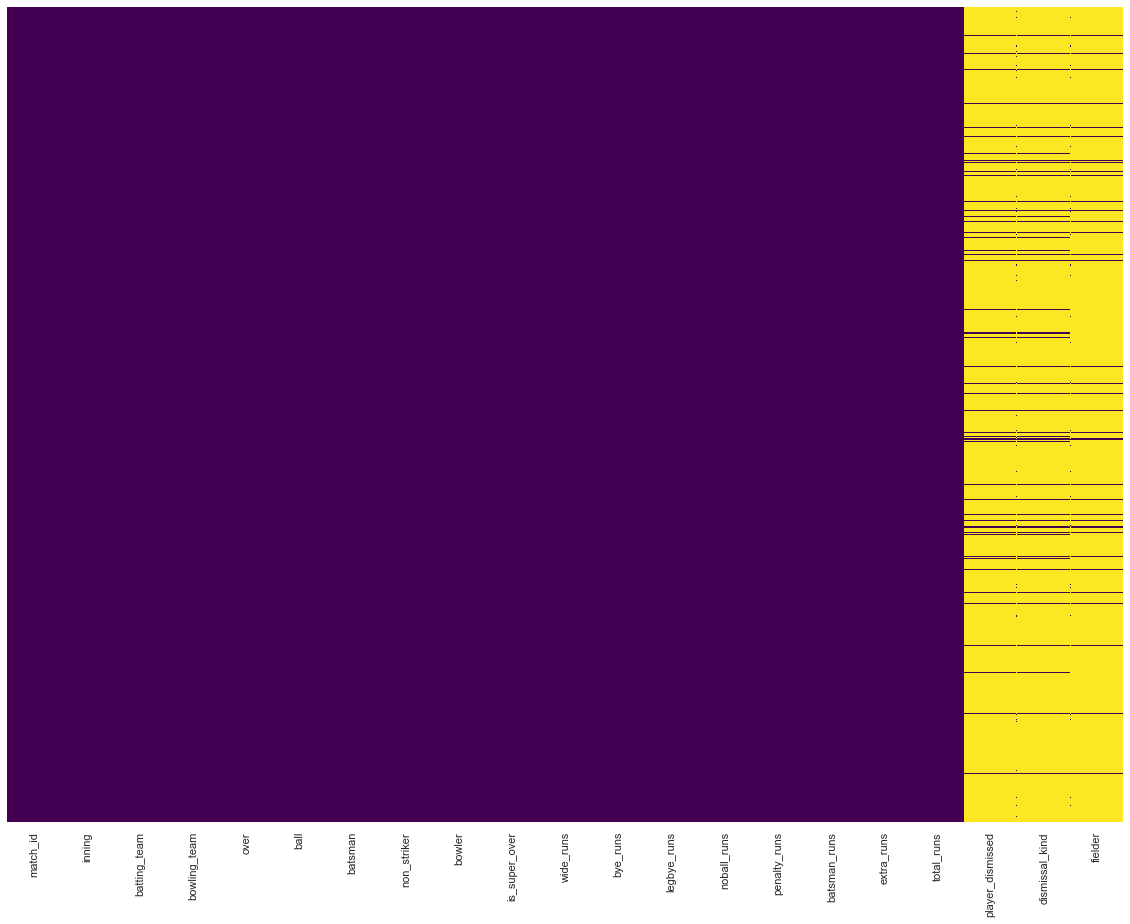

In [11]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
data1.drop('player_dismissed',axis=1,inplace=True),
data1.drop('dismissal_kind',axis=1,inplace=True),
data1.drop('fielder',axis=1,inplace=True)

In [13]:
data1.shape

(179078, 18)

In [14]:
# Total num of Matches held:

data1['match_id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [15]:
data1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')

In [16]:
data1['match_id'].max()

11415

In [17]:
data1['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
data1 = data1.replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [63]:
data1['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

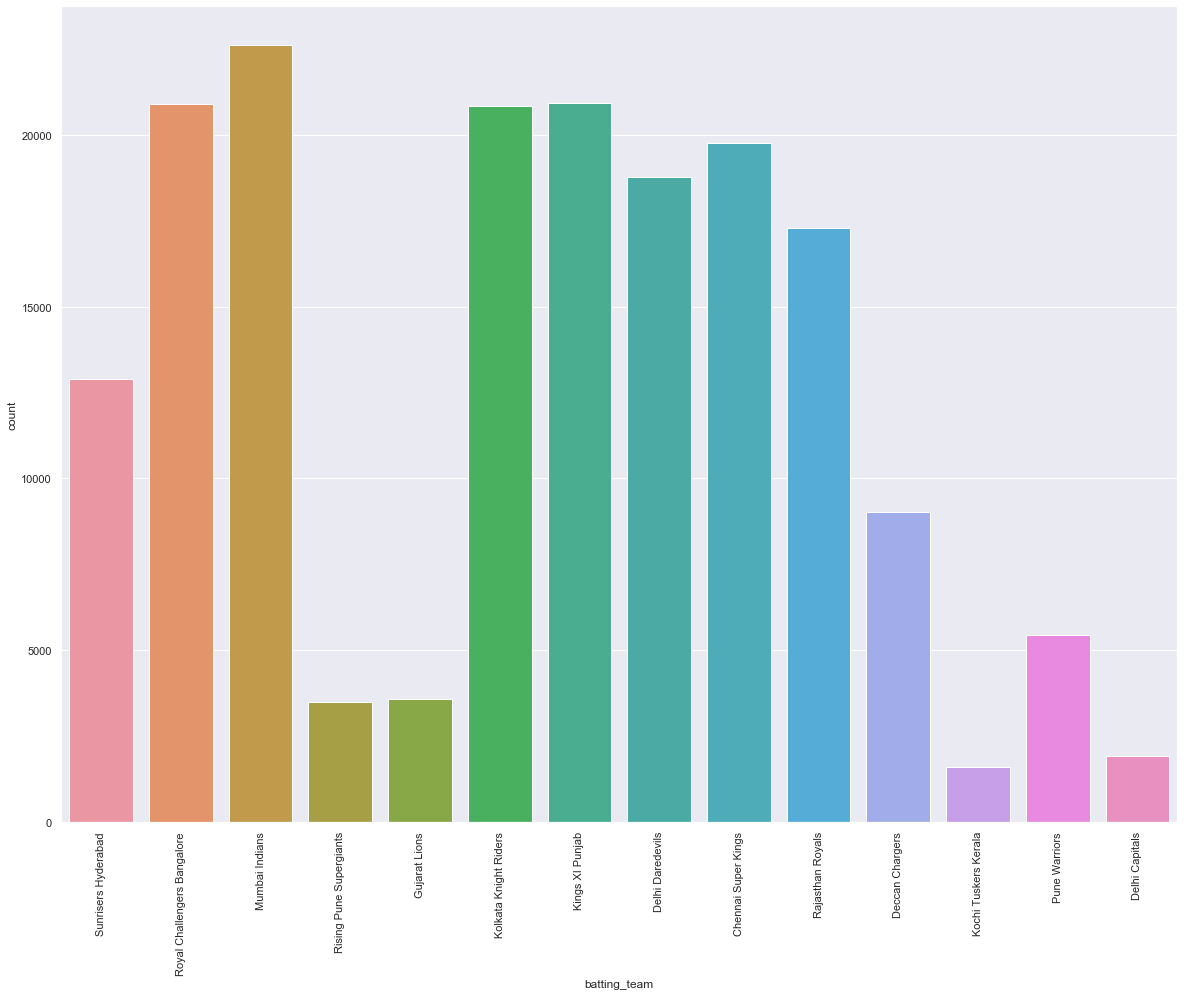

In [64]:
sns.countplot('batting_team',data=data1)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

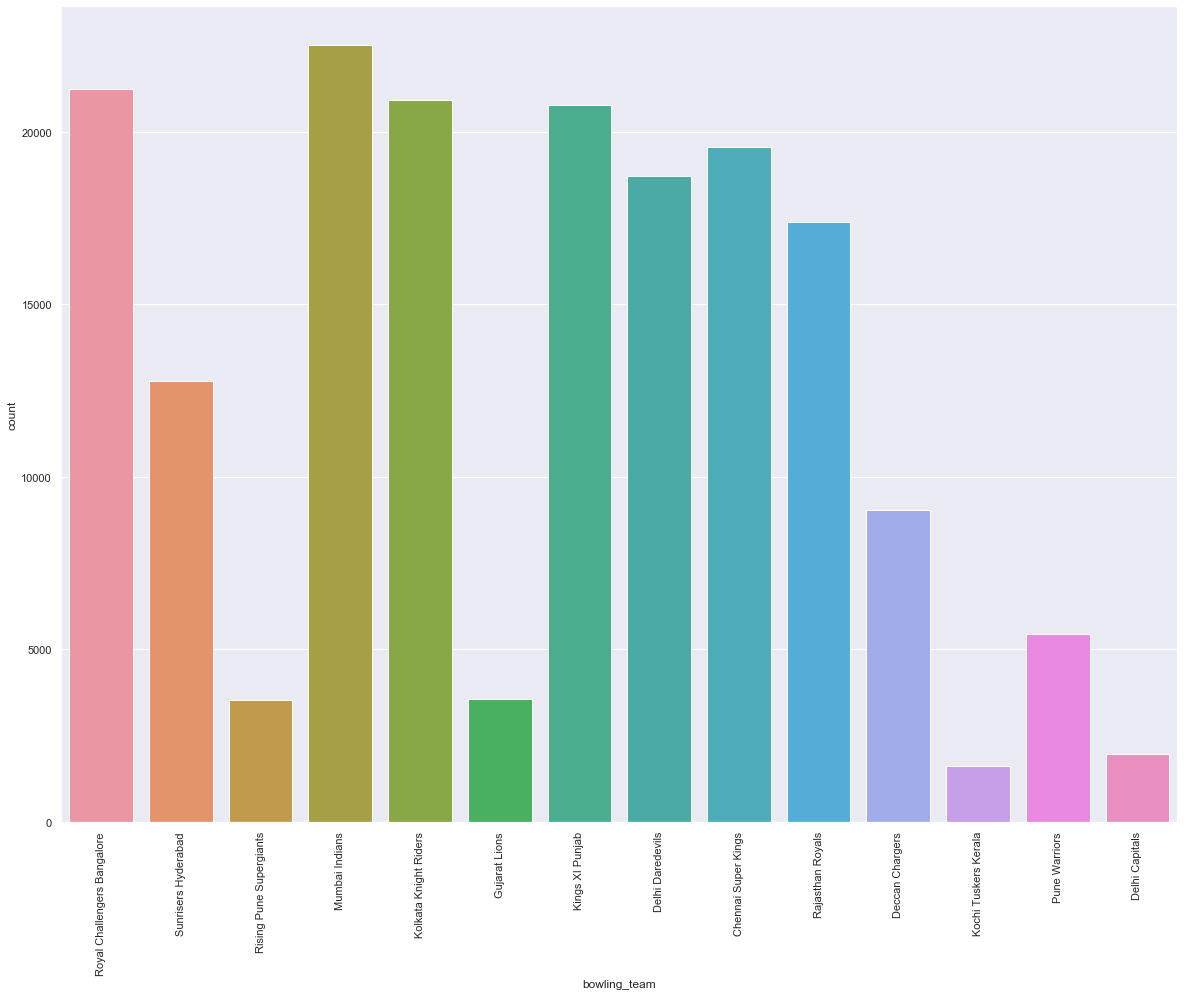

In [65]:
sns.countplot('bowling_team',data=data1)
plt.xticks(rotation=90)

'Mumbai Indians' have participated in more number of matches compared to other teams

'Kochi Tuskers Kerala' have participated in less number of matches compared to other teams


In [66]:
data1['over'].max()

20

All the matches are Twenty Twenty (Twenty overs in total)

In [22]:
#The names of Batsman participated in IPL

data1['batsman'].unique(), data1['batsman'].nunique()

(array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
        'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
        'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
        'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
        'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
        'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
        'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
        'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
        'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
        'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
        'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
        'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
        'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
        'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',


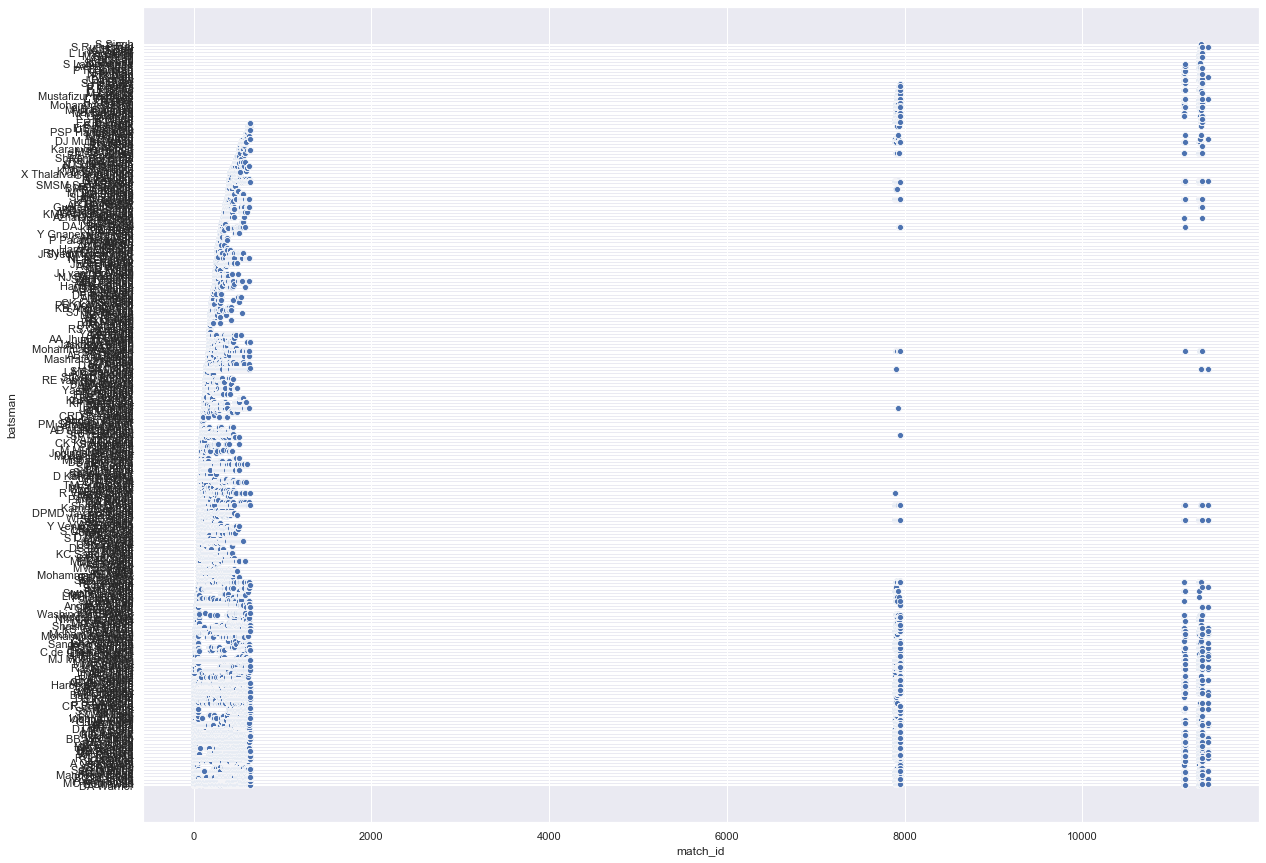

In [69]:
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot(x='match_id',y='batsman',data=data1)

In [23]:
#The names of non-strikers participated in IPL

data1['non_striker'].unique(), data1['non_striker'].nunique()

(array(['S Dhawan', 'DA Warner', 'MC Henriques', 'Yuvraj Singh',
        'DJ Hooda', 'BCJ Cutting', 'Mandeep Singh', 'CH Gayle', 'TM Head',
        'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
        'TS Mills', 'YS Chahal', 'A Choudhary', 'JC Buttler', 'PA Patel',
        'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
        'HH Pandya', 'TG Southee', 'MJ McClenaghan', 'MA Agarwal',
        'AM Rahane', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'BB McCullum',
        'JJ Roy', 'SK Raina', 'AJ Finch', 'KD Karthik', 'DR Smith',
        'CA Lynn', 'G Gambhir', 'MK Tiwary', 'DT Christian', 'R Bhatia',
        'M Vohra', 'HM Amla', 'WP Saha', 'AR Patel', 'GJ Maxwell',
        'DA Miller', 'Vishnu Vinod', 'P Negi', 'Iqbal Abdulla',
        'SW Billings', 'AP Tare', 'KK Nair', 'SV Samson', 'RR Pant',
        'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra', 'Z Khan',
        'DS Kulkarni', 'P Kumar', 'Basil Thampi', 'MK Pandey', 'YK Pathan',
        

In [24]:
#The names of bowlers participated in IPL

data1['bowler'].unique(),data1['bowler'].nunique()

(array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
        'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
        'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
        'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
        'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
        'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
        'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
        'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
        'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
        'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
        'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
        'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
        'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
        'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
        'Mustafizur Rahman', '

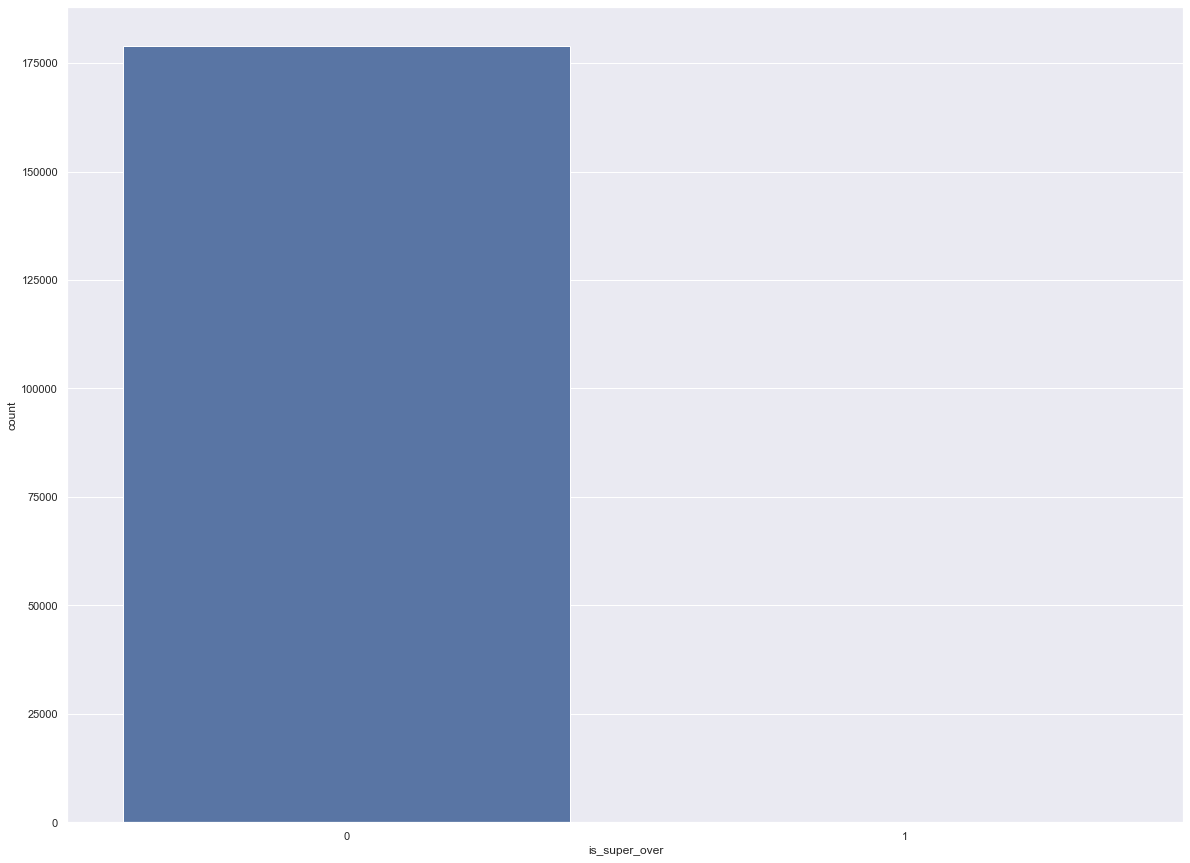

In [71]:
#The num of times we had draw matches in IPL , which lead to Super_over

sns.countplot('is_super_over',data=data1)

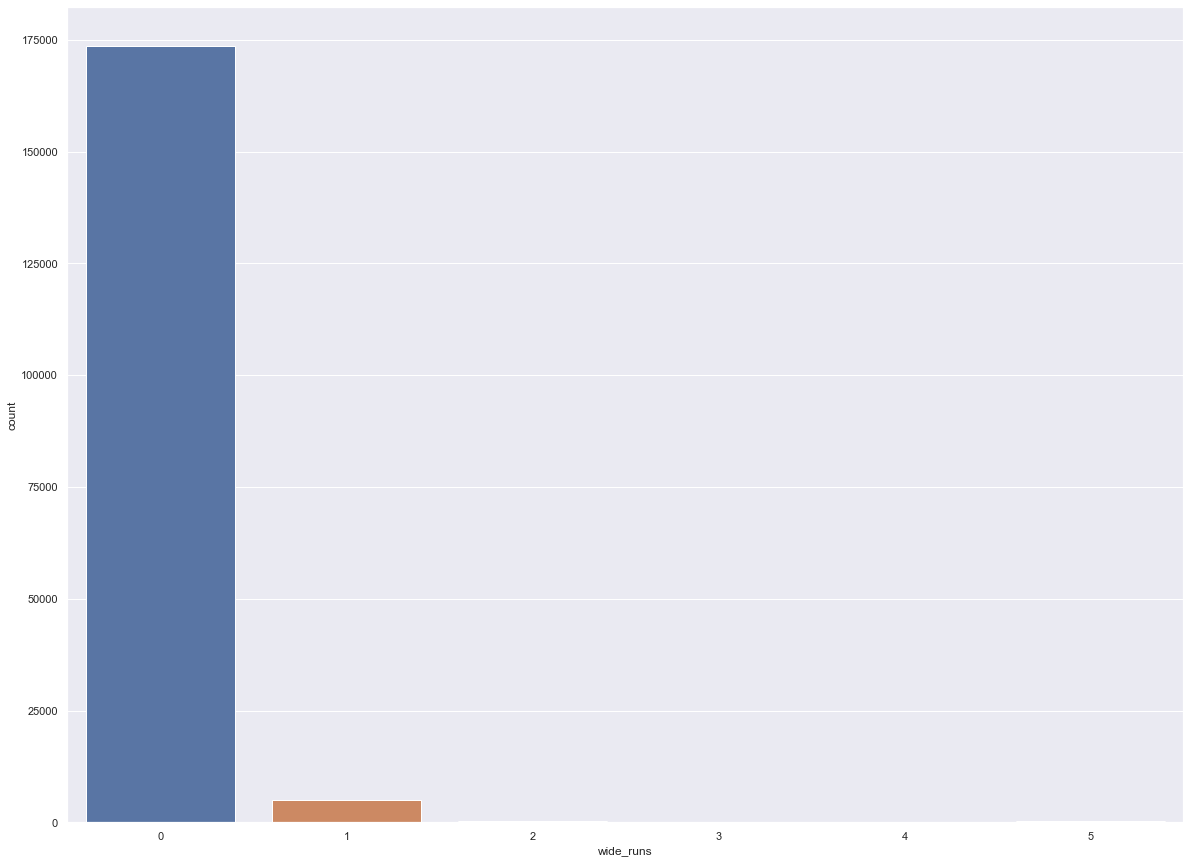

In [73]:
#The num of wide runs we had in IPL
sns.countplot('wide_runs',data=data1)

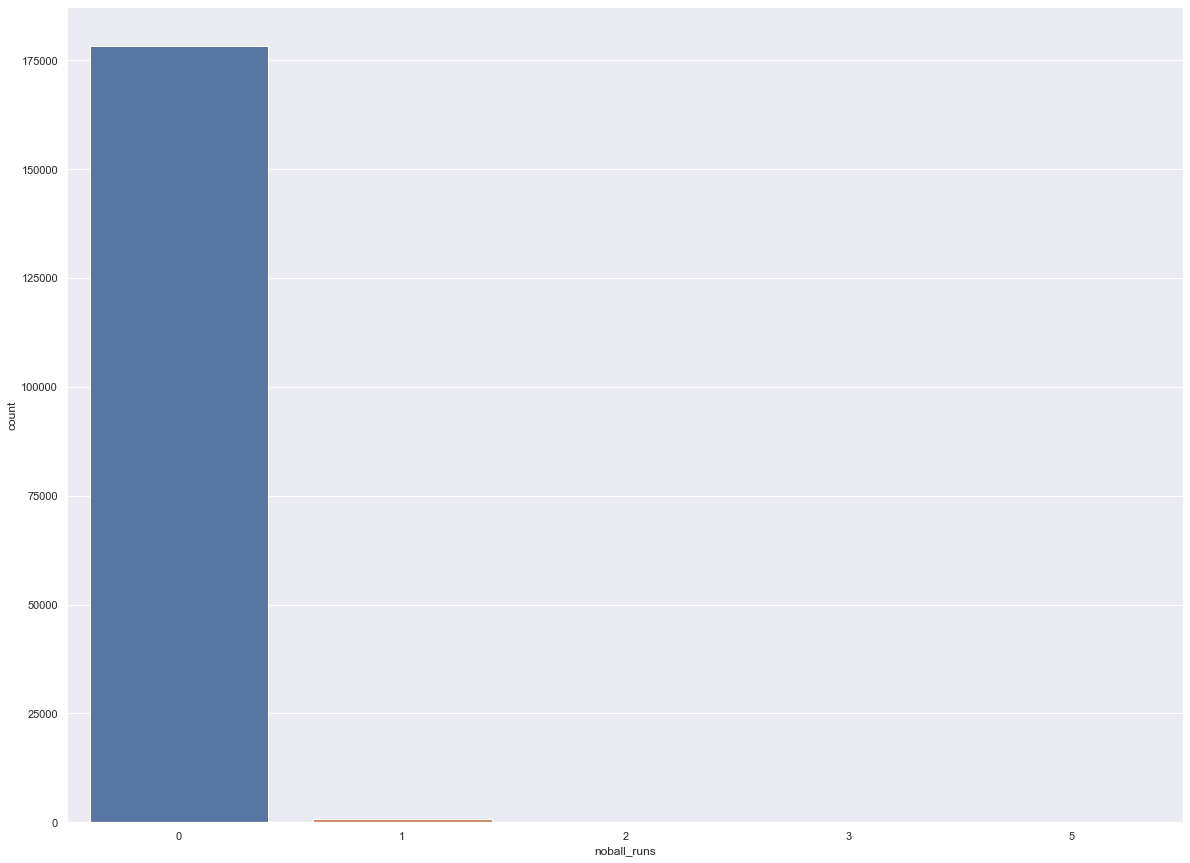

In [74]:
#The num of noball runs we had in IPL
sns.countplot('noball_runs',data=data1)

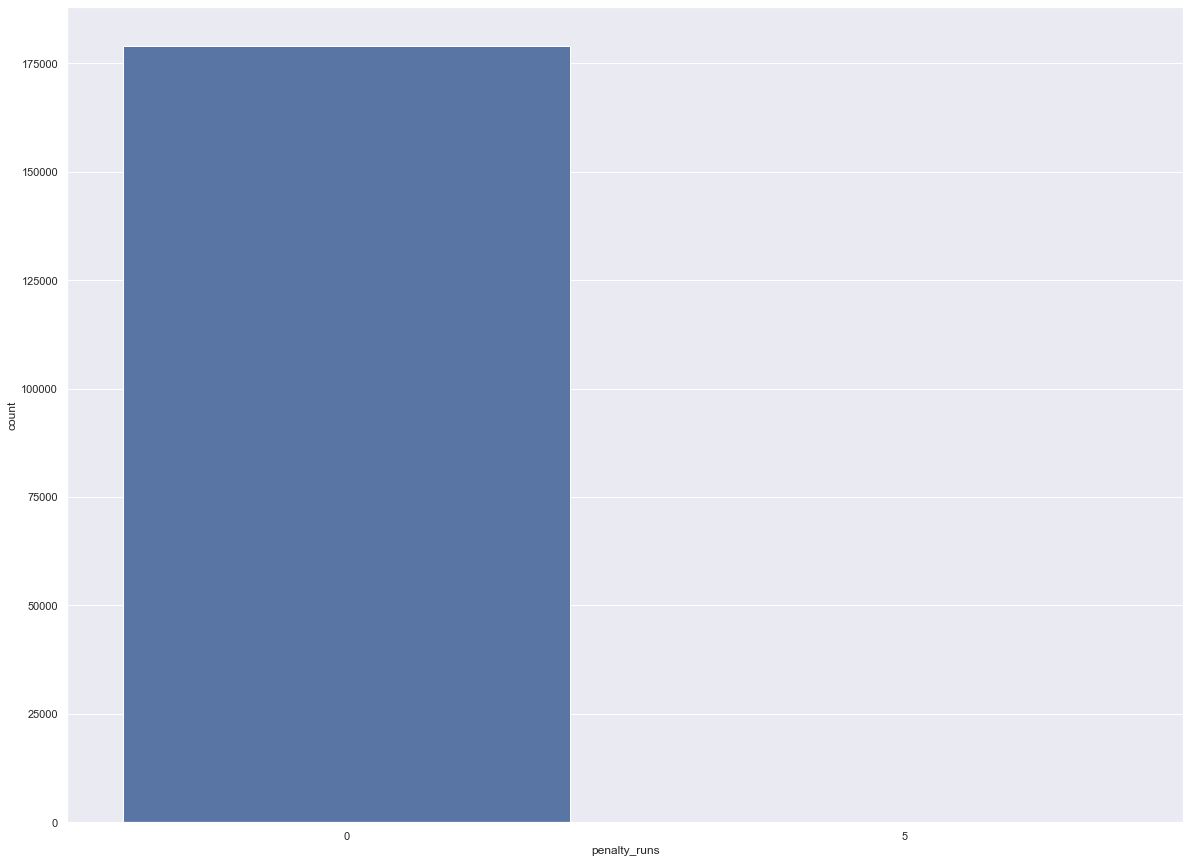

In [75]:
#The num of penalty runs we had in IPL
sns.countplot('penalty_runs',data=data1)

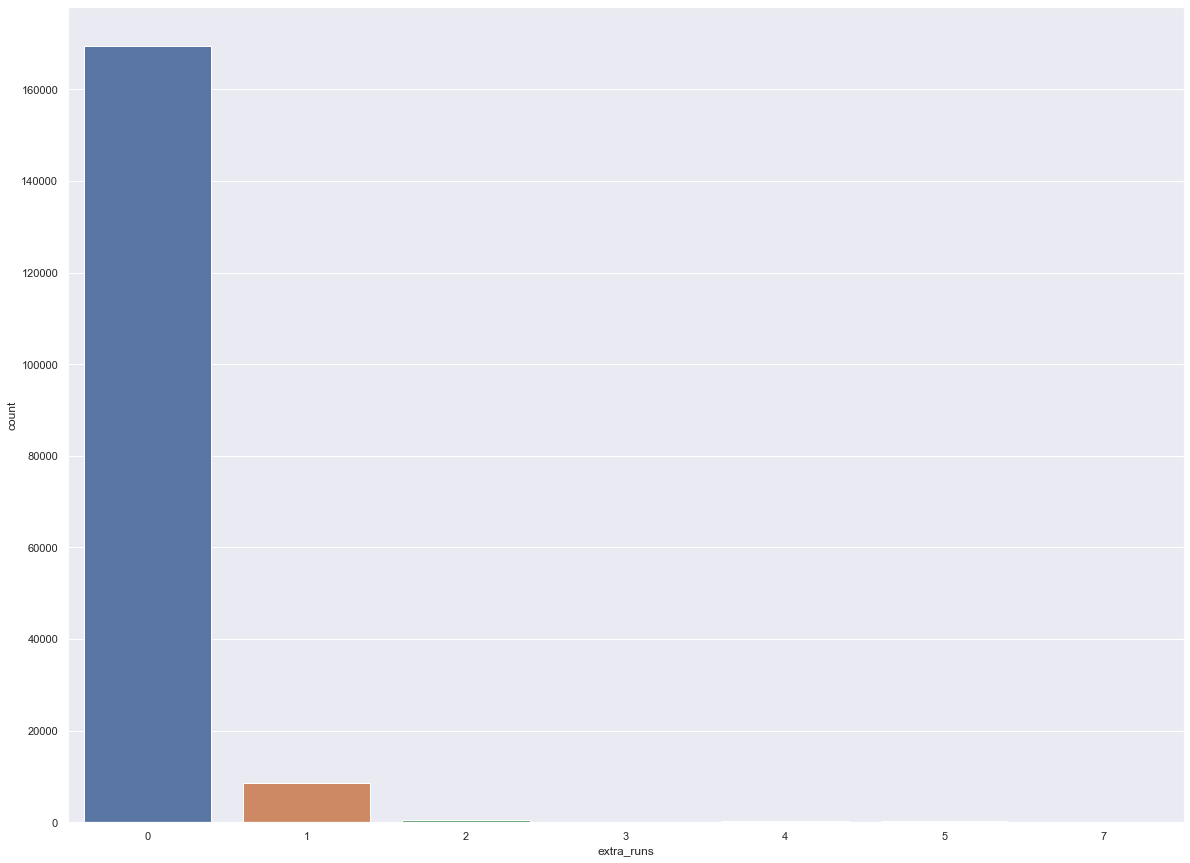

In [76]:
#The num of extra runs drawn by all the batsmen participated in IPL
sns.countplot('extra_runs',data=data1)

In [77]:
corr = data1.corr()

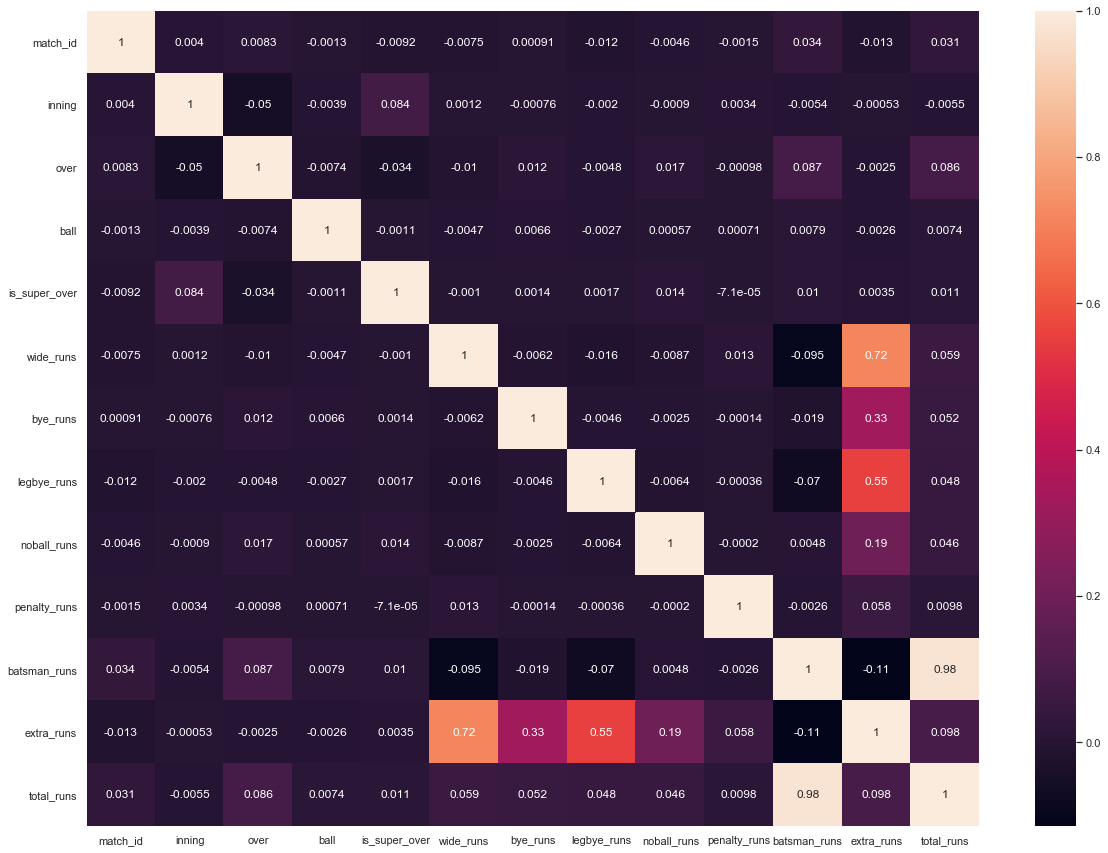

In [78]:
sns.heatmap(corr,annot=True)

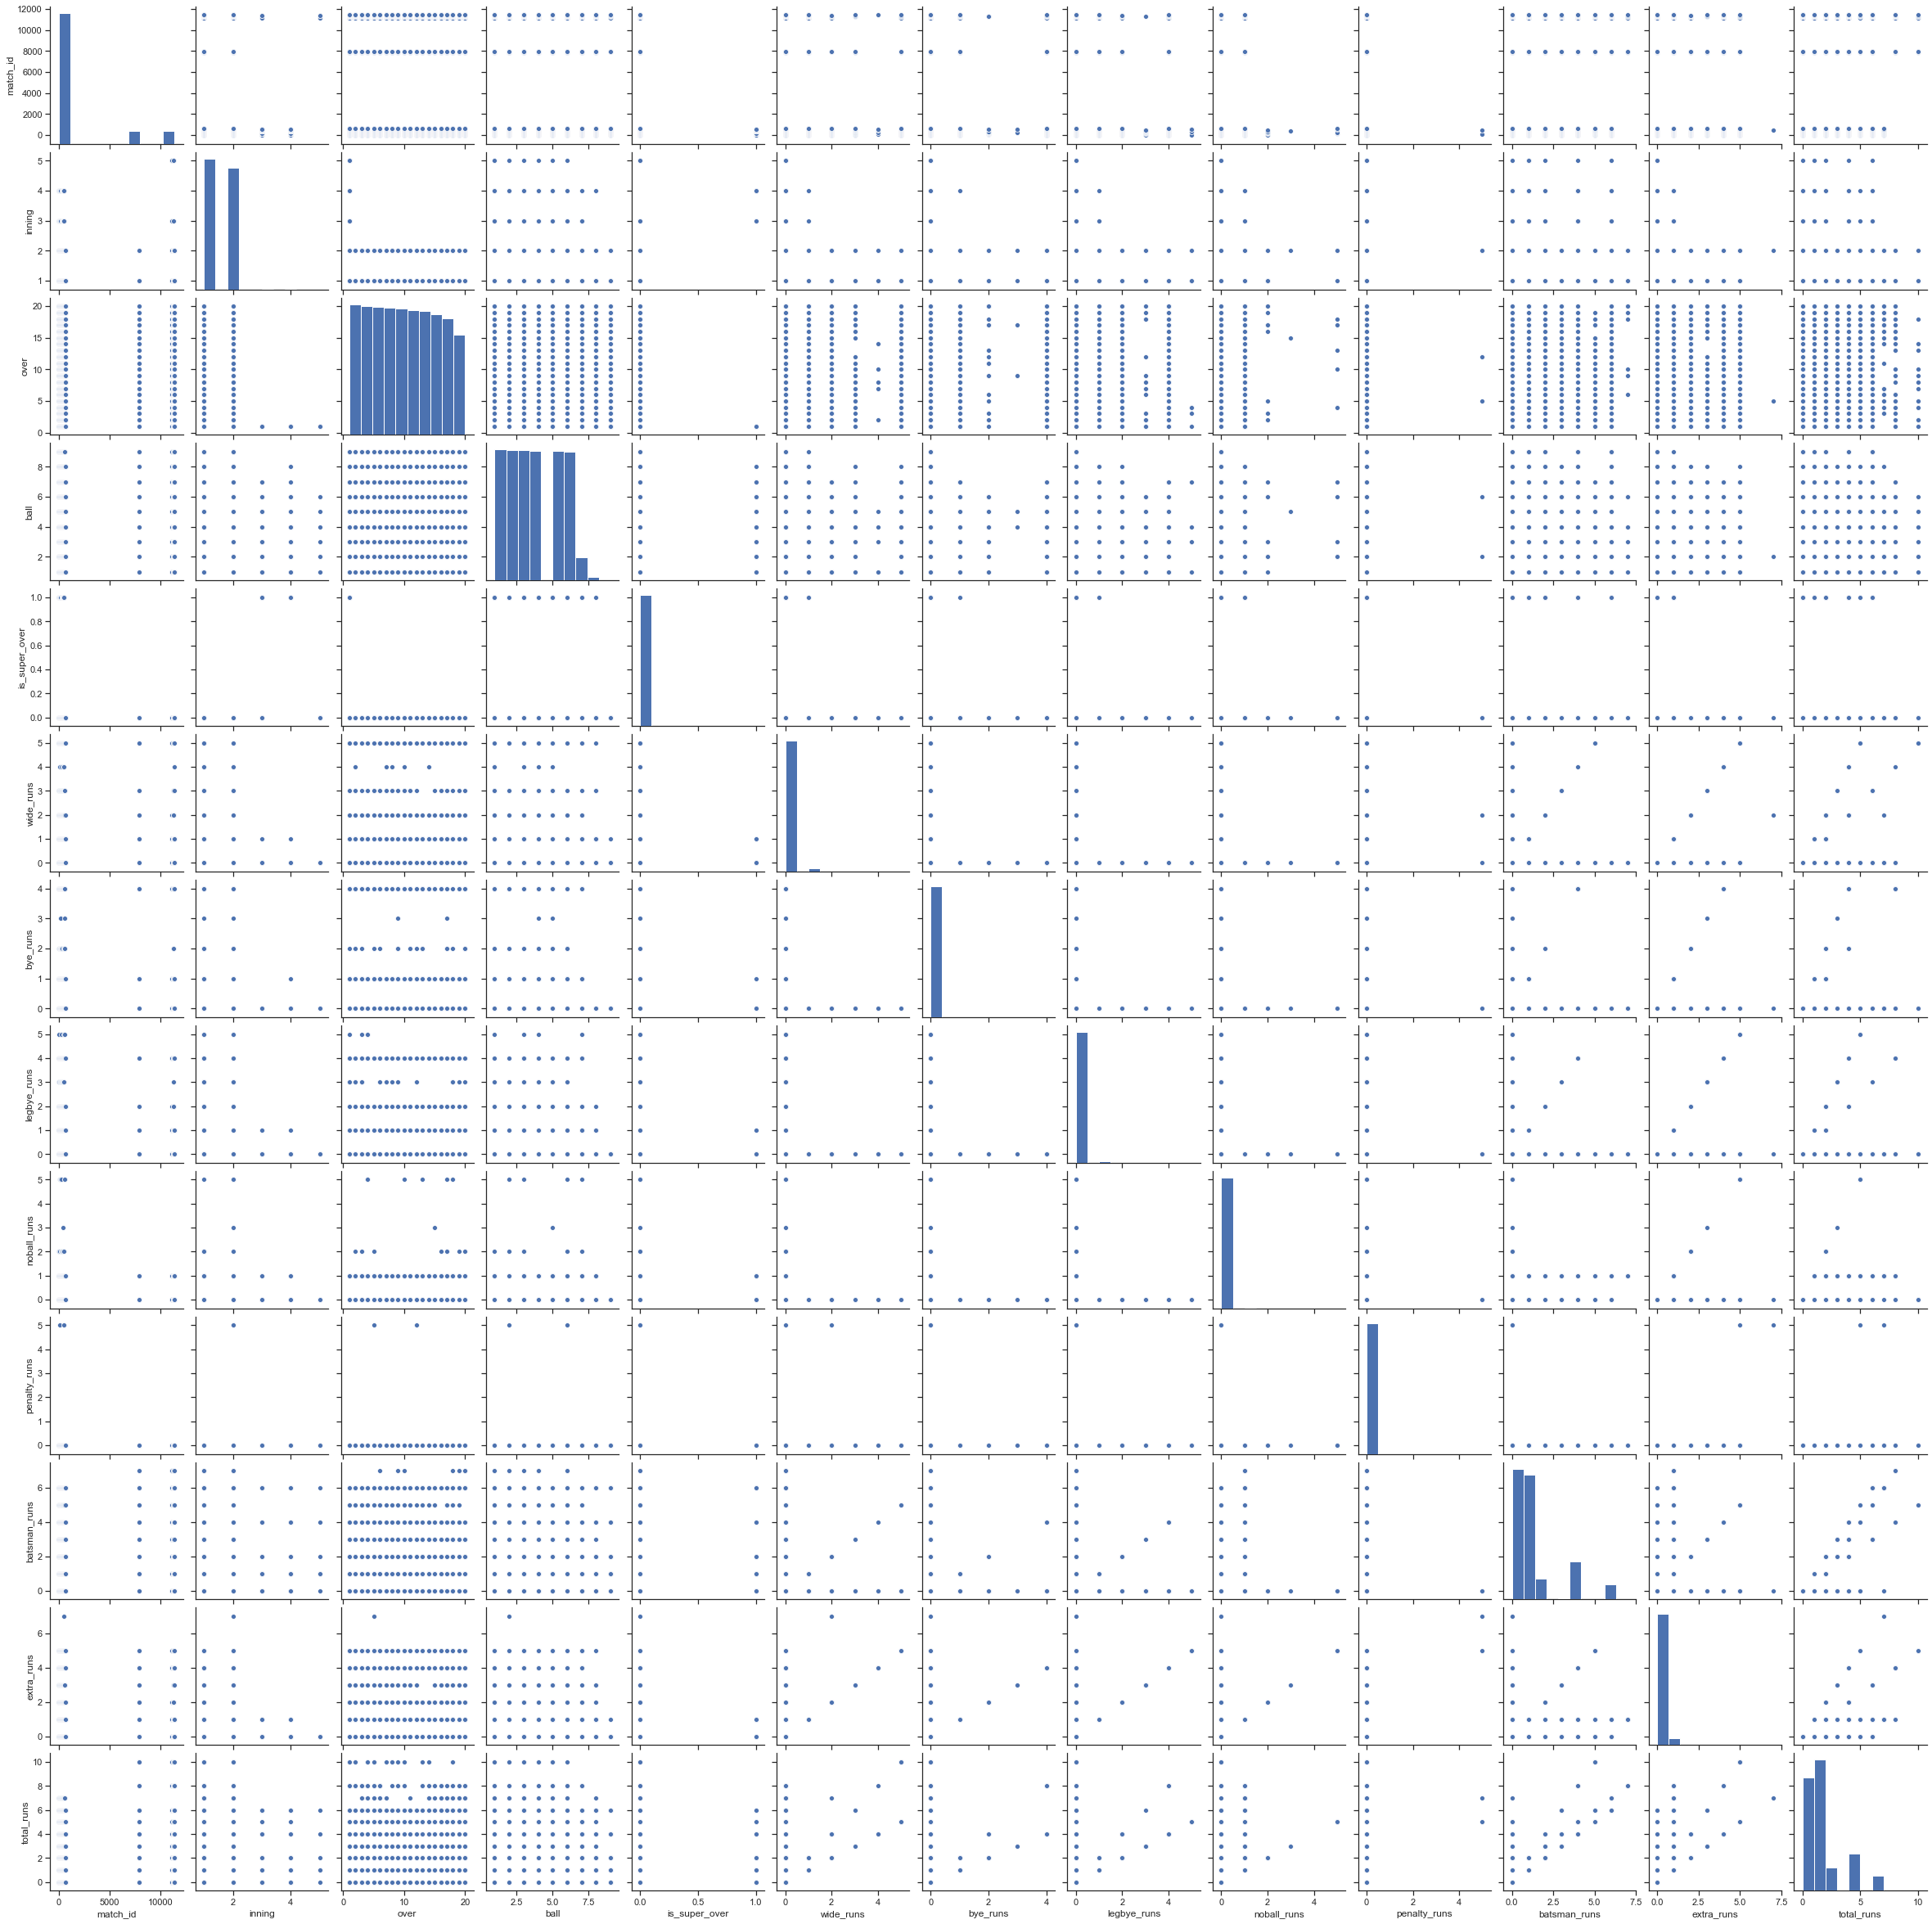

In [81]:
sns.set(style='ticks')
sns.pairplot(data1,palette='husl')

#EDA of data2

In [30]:
data2.tail(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [31]:
data2.shape

(756, 18)

In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [33]:
data2.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [34]:
data2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [35]:
corr = data2.corr()

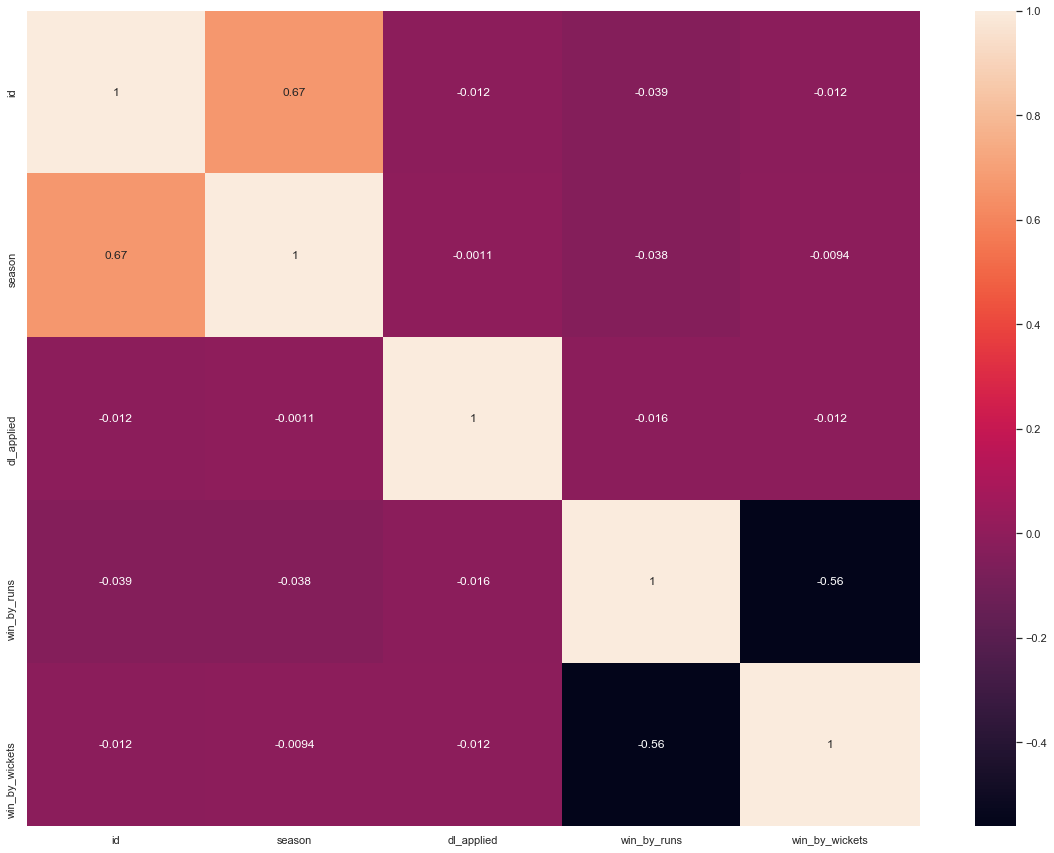

In [36]:
sns.heatmap(corr,annot=True)

In [37]:
# To find the total num of matches held

data2['id'].max()

11415

In [38]:
# To find the num of seasons of IPL

data2['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

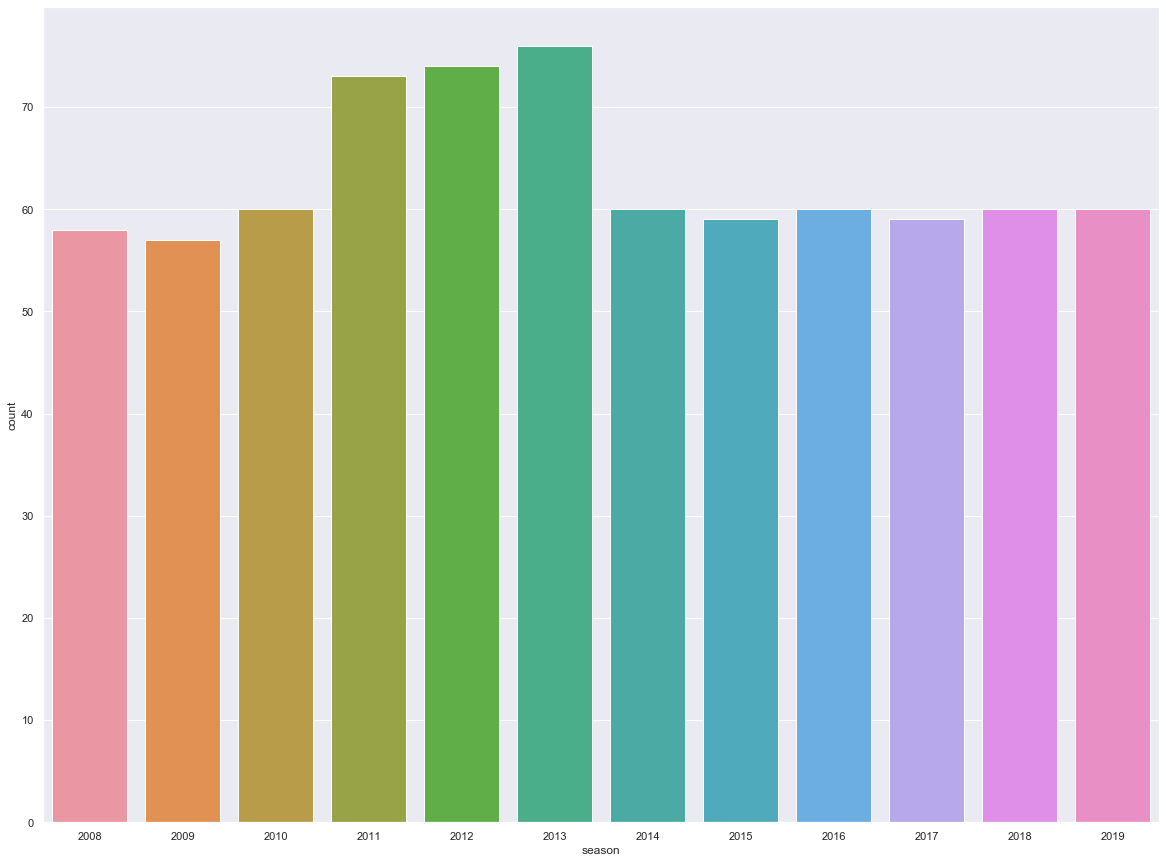

In [39]:
sns.countplot(x='season',data=data2)

In [40]:
data2['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [41]:
data2['city'].nunique()

32

In [42]:
data2.city.fillna('Not Specified',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

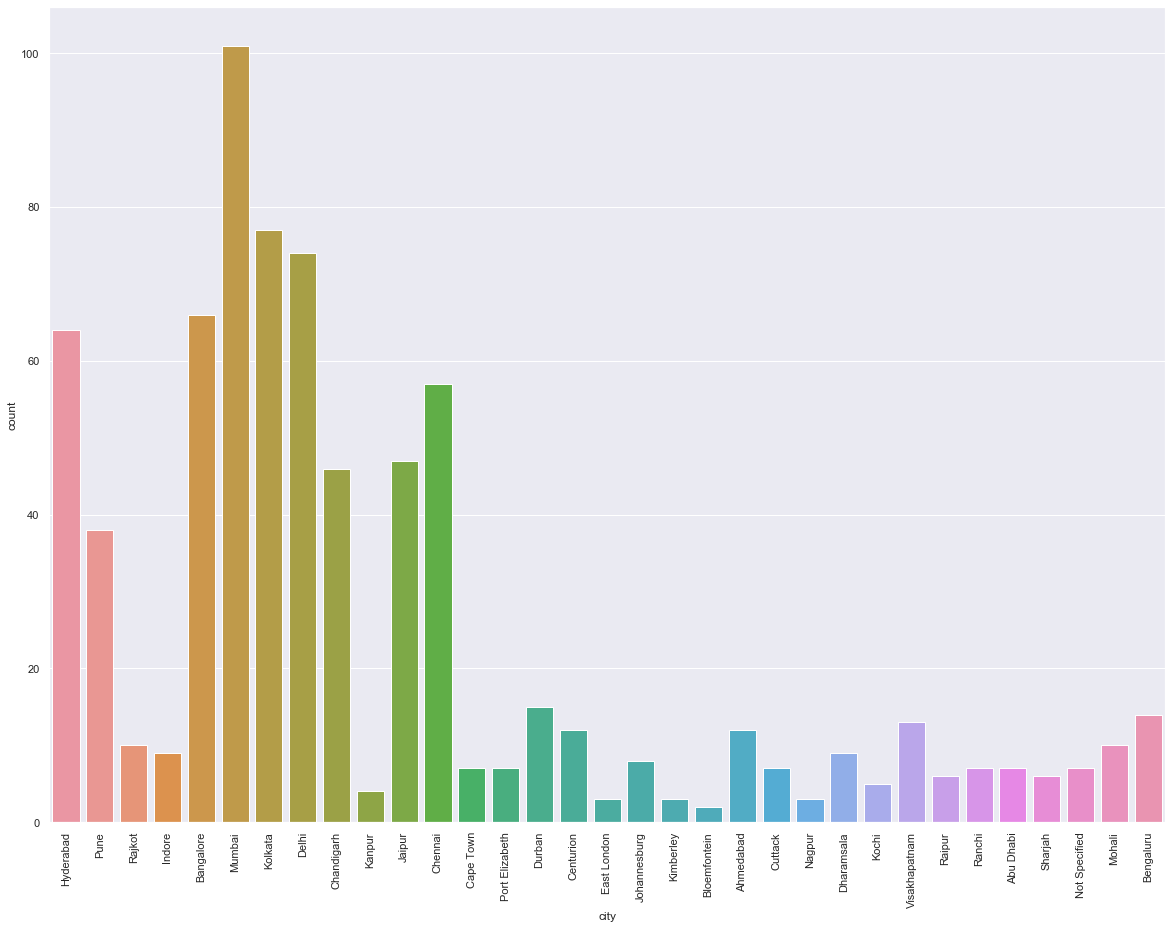

In [43]:
sns.countplot(x='city',data=data2)
plt.xticks(rotation=90)

In [82]:
data2['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [83]:
data2 = data2.replace('Rising Pune Supergiant','Rising Pune Supergiants')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

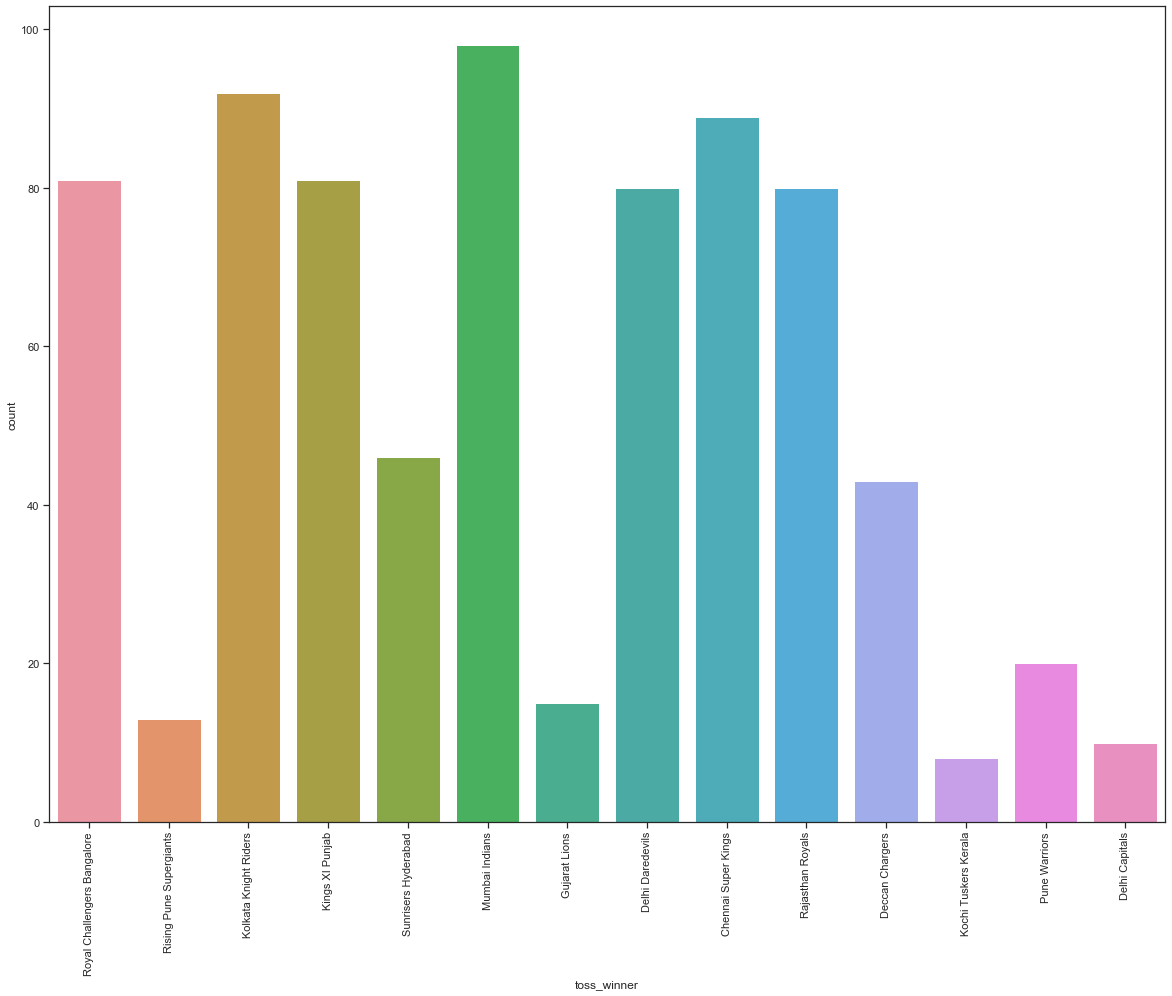

In [84]:
sns.countplot(x='toss_winner',data=data2)
plt.xticks(rotation=90)

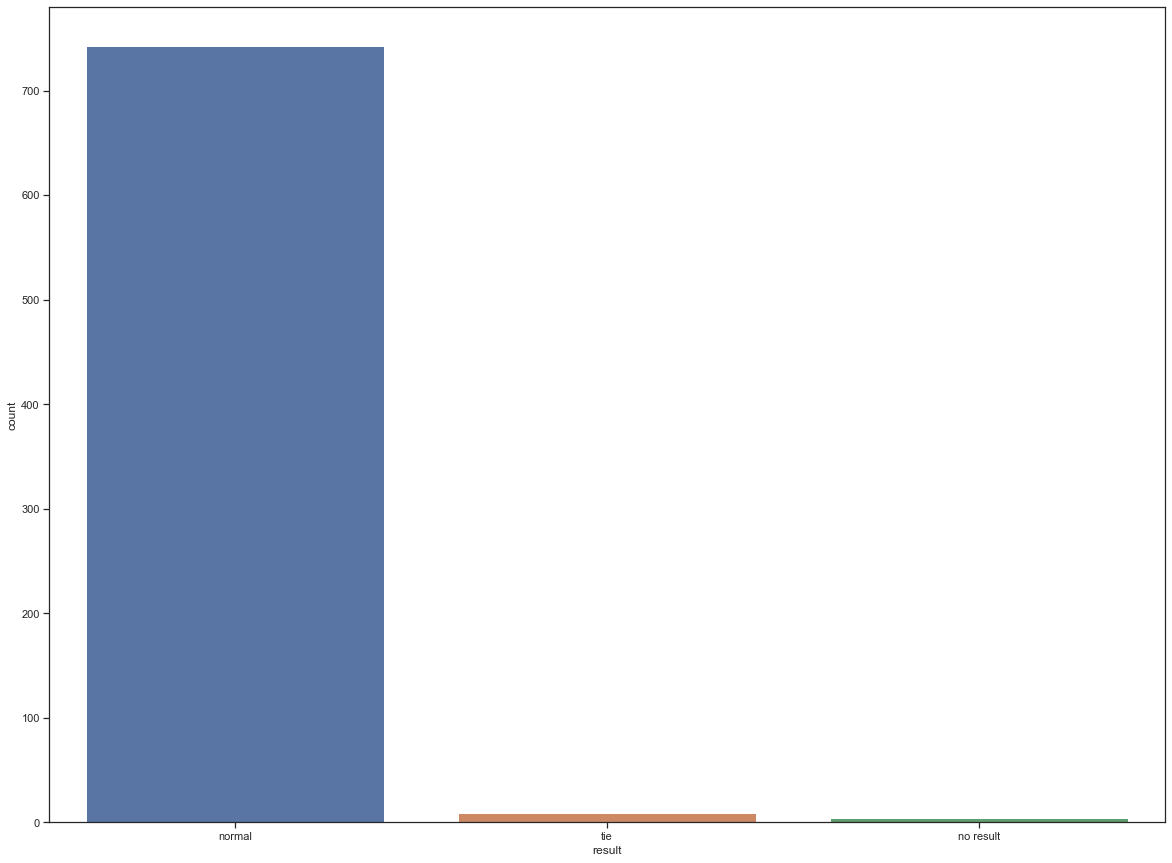

In [85]:
sns.countplot(x='result',data=data2)

In [86]:
round(data2.isnull().sum()/len(data2)*100 , 2)

id                 0.0
season             0.0
city               0.0
date               0.0
team1              0.0
team2              0.0
toss_winner        0.0
toss_decision      0.0
result             0.0
dl_applied         0.0
winner             0.0
win_by_runs        0.0
win_by_wickets     0.0
player_of_match    0.0
venue              0.0
umpire1            0.0
umpire2            0.0
dtype: float64

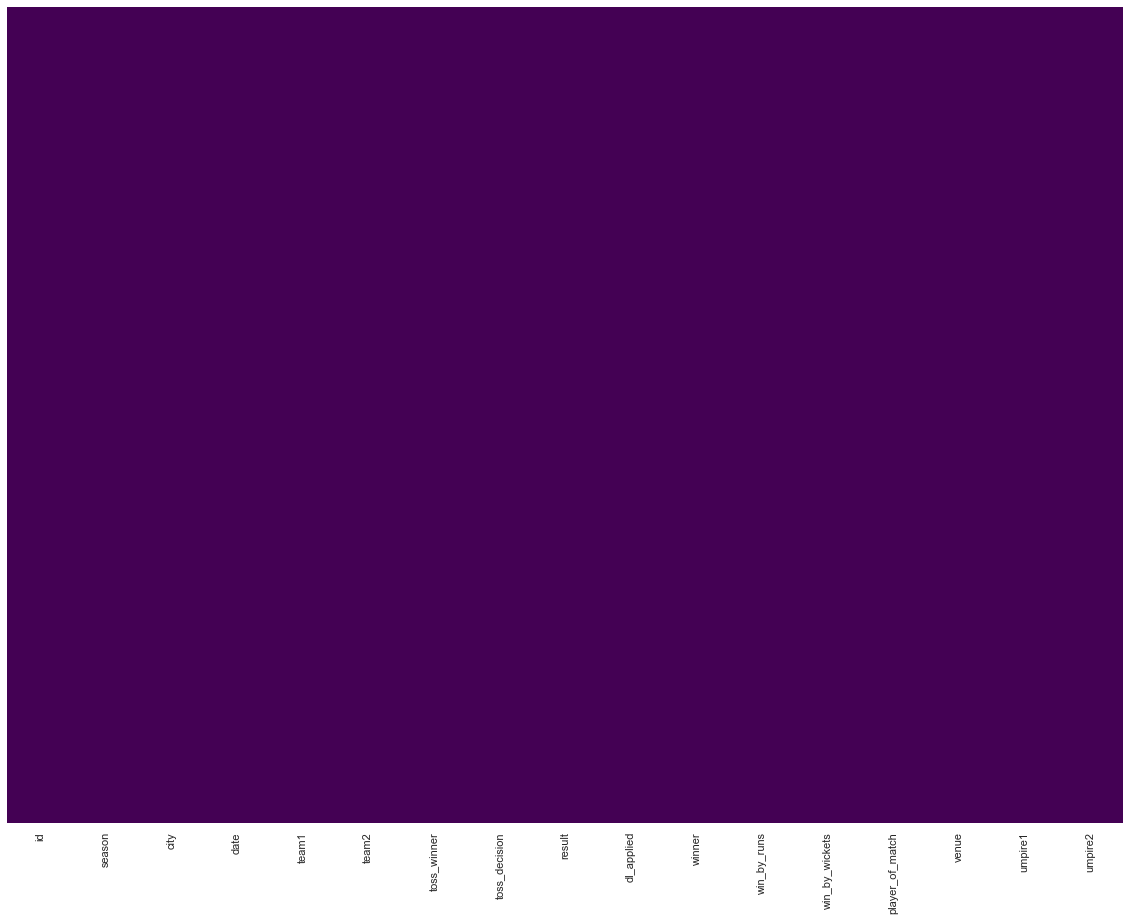

In [87]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [88]:
data2.drop('umpire3',axis=1,inplace=True)

KeyError: "['umpire3'] not found in axis"

In [49]:
data2.fillna('Not Specified',inplace=True)

In [50]:
data2.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [89]:
data2['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Not Specified', 'Delhi Capitals'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

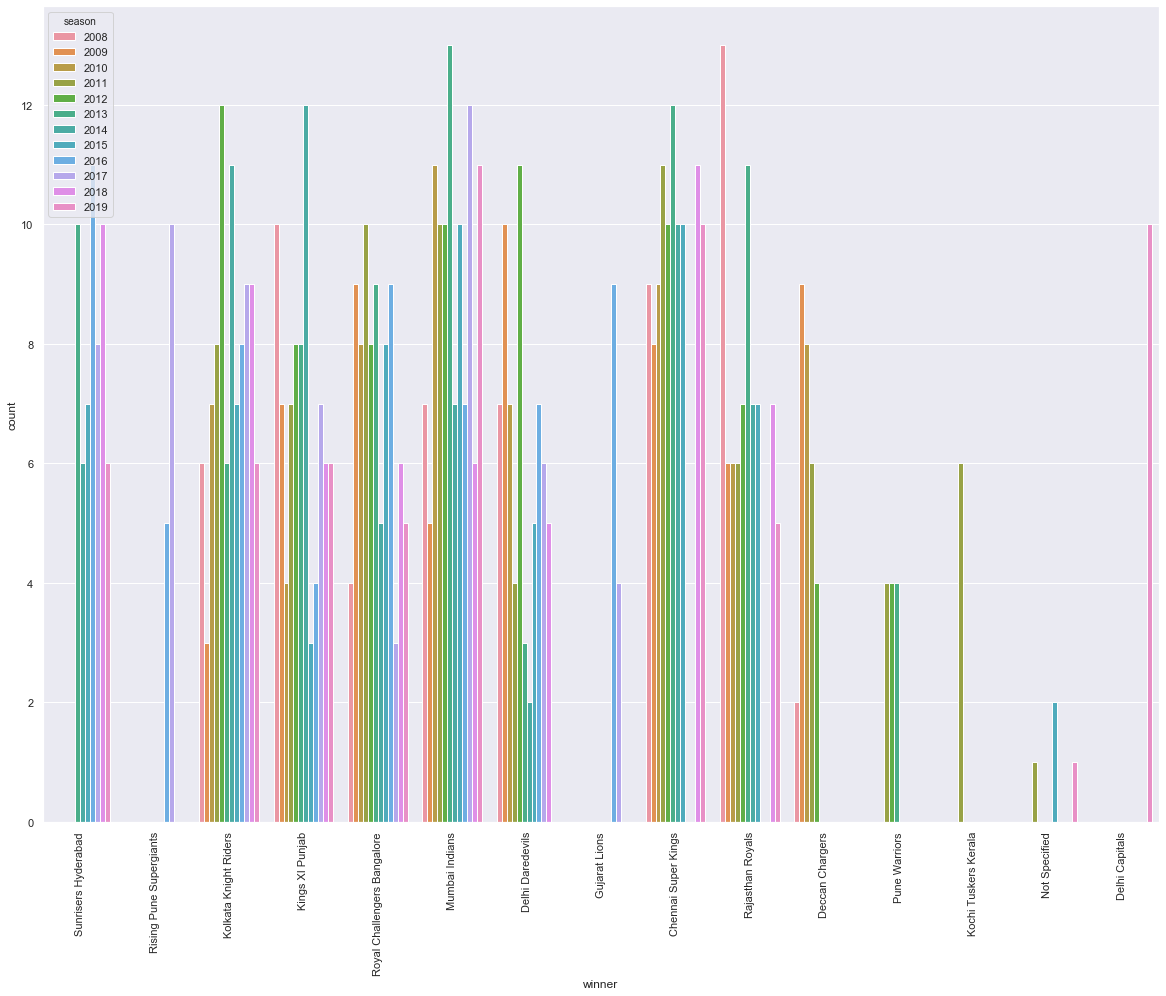

In [90]:
sns.countplot(x='winner',hue='season',data=data2)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

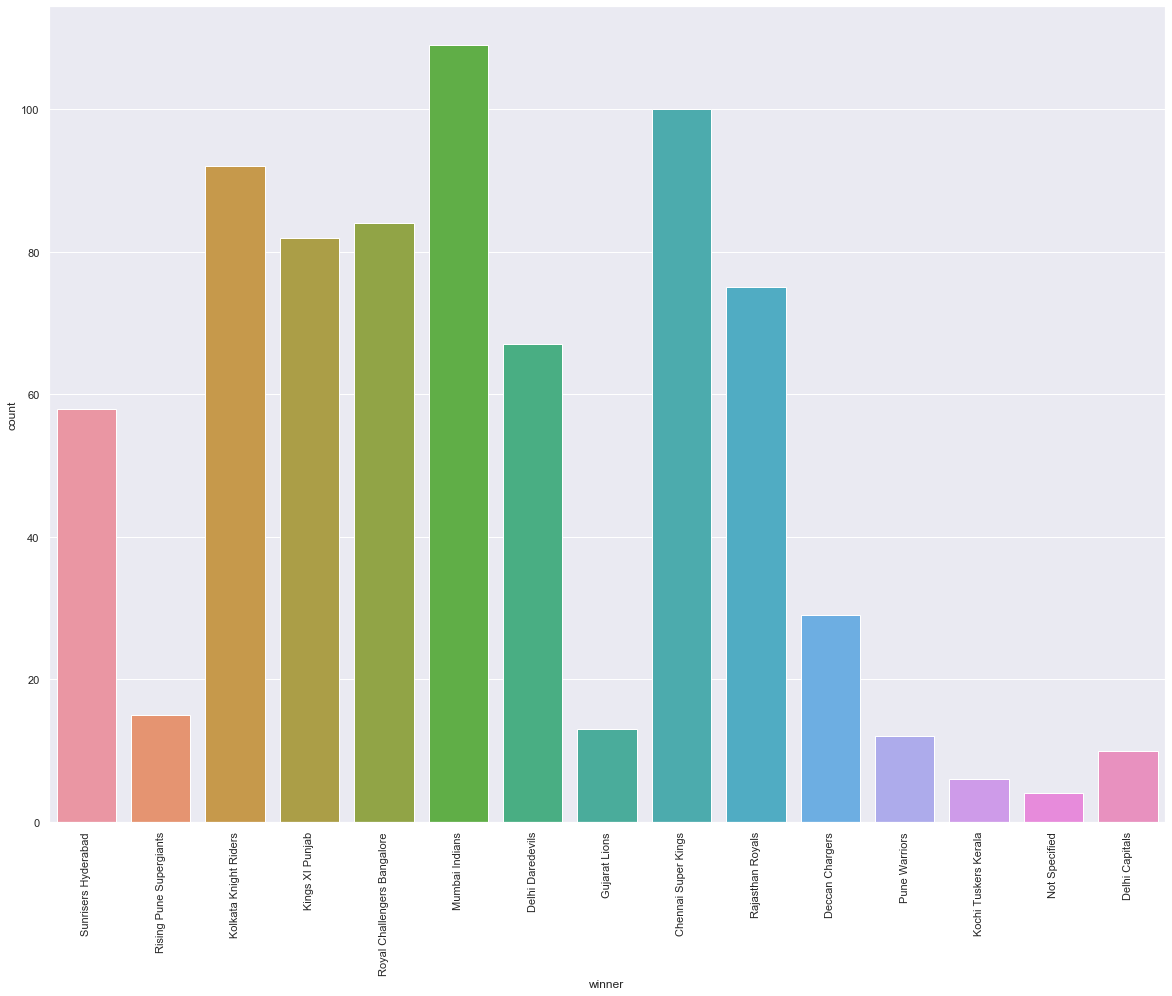

In [91]:
sns.countplot(x='winner',data=data2)
plt.xticks(rotation=90)

In [56]:
#Mumbai Indians are the team how had been the maximun winners of IPL

In [92]:
data2['win_by_runs'].nunique()

89

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

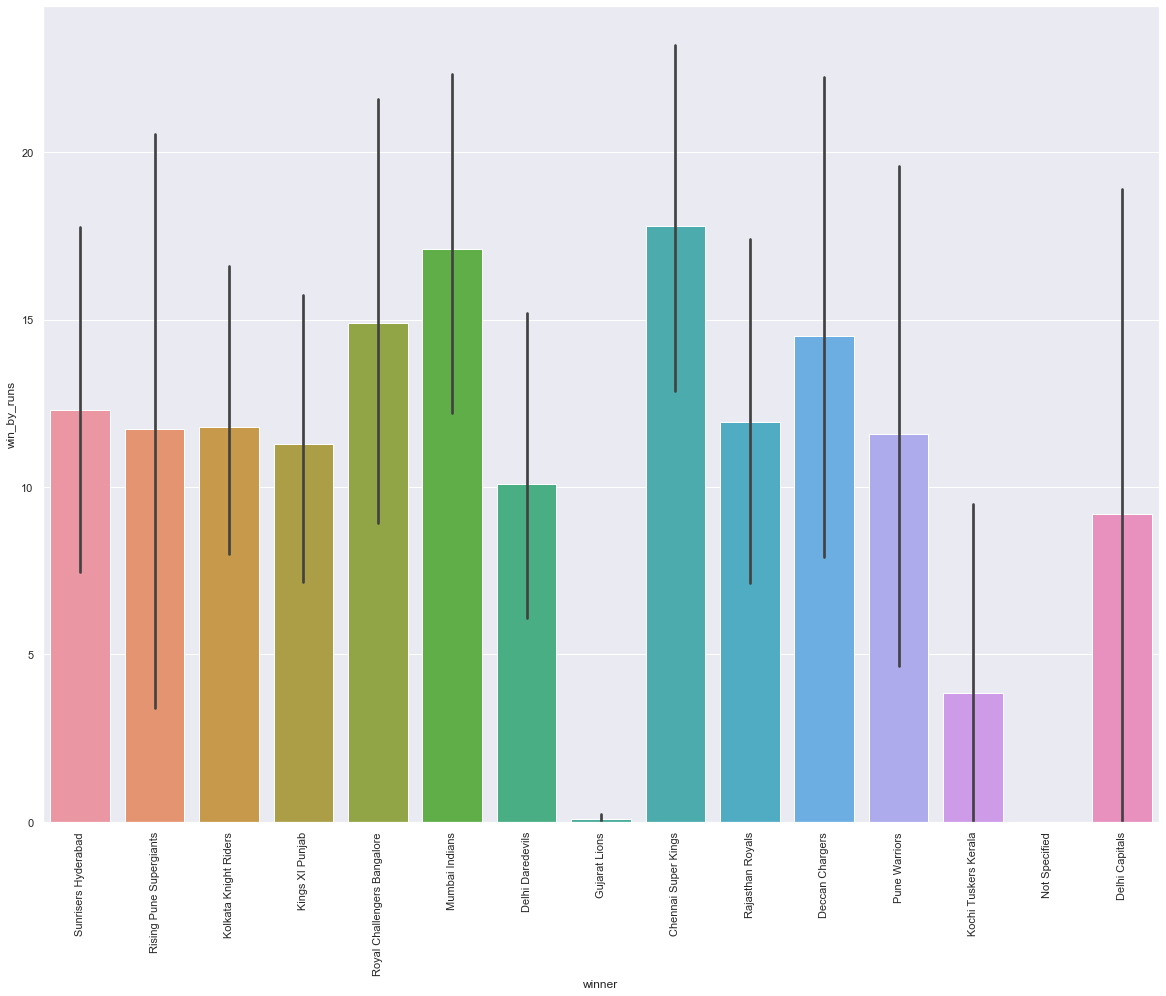

In [93]:
sns.barplot(x='winner',y='win_by_runs',data=data2)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

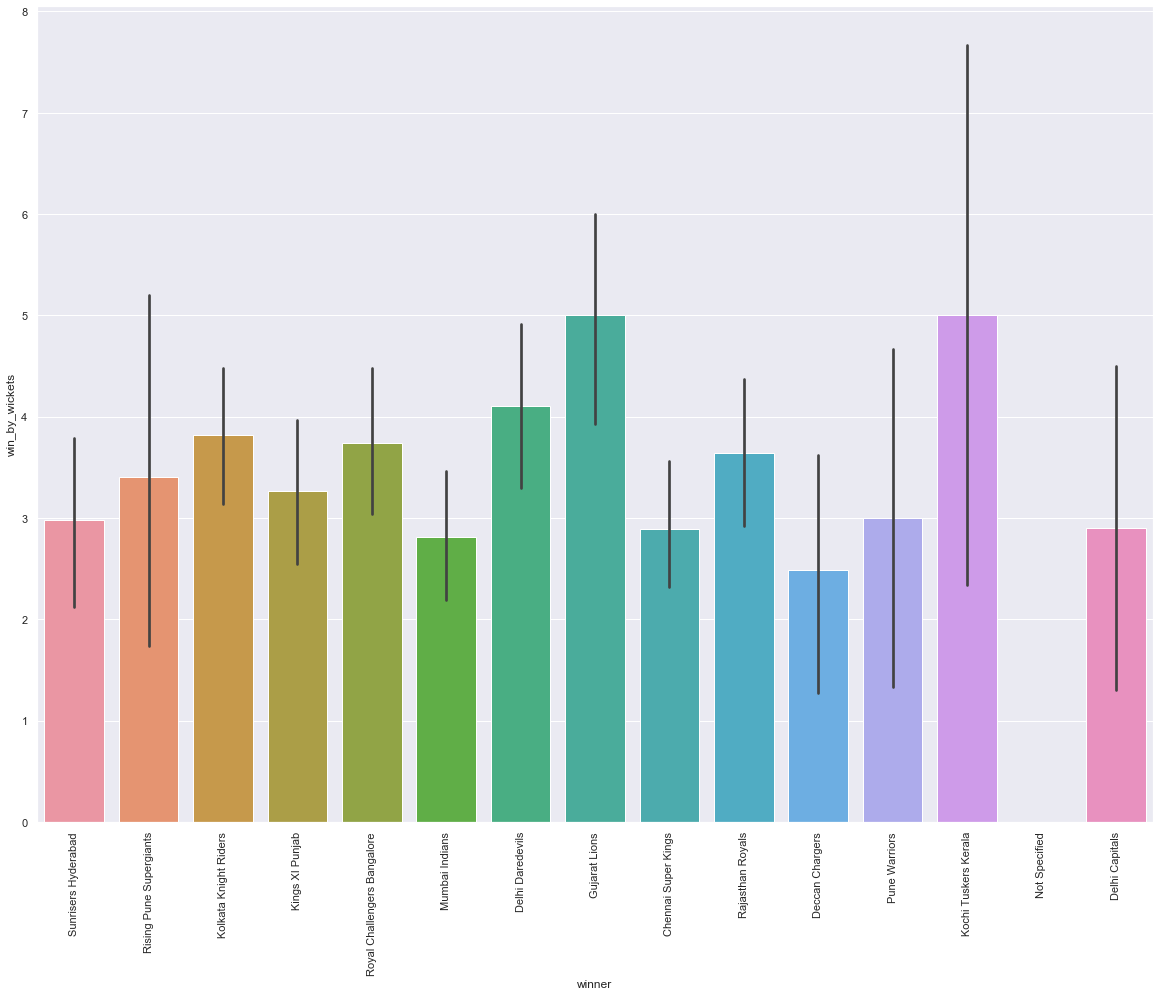

In [94]:
sns.barplot(x='winner',y='win_by_wickets',data=data2)
plt.xticks(rotation=90)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 <a list of 10 Text xticklabel objects>)

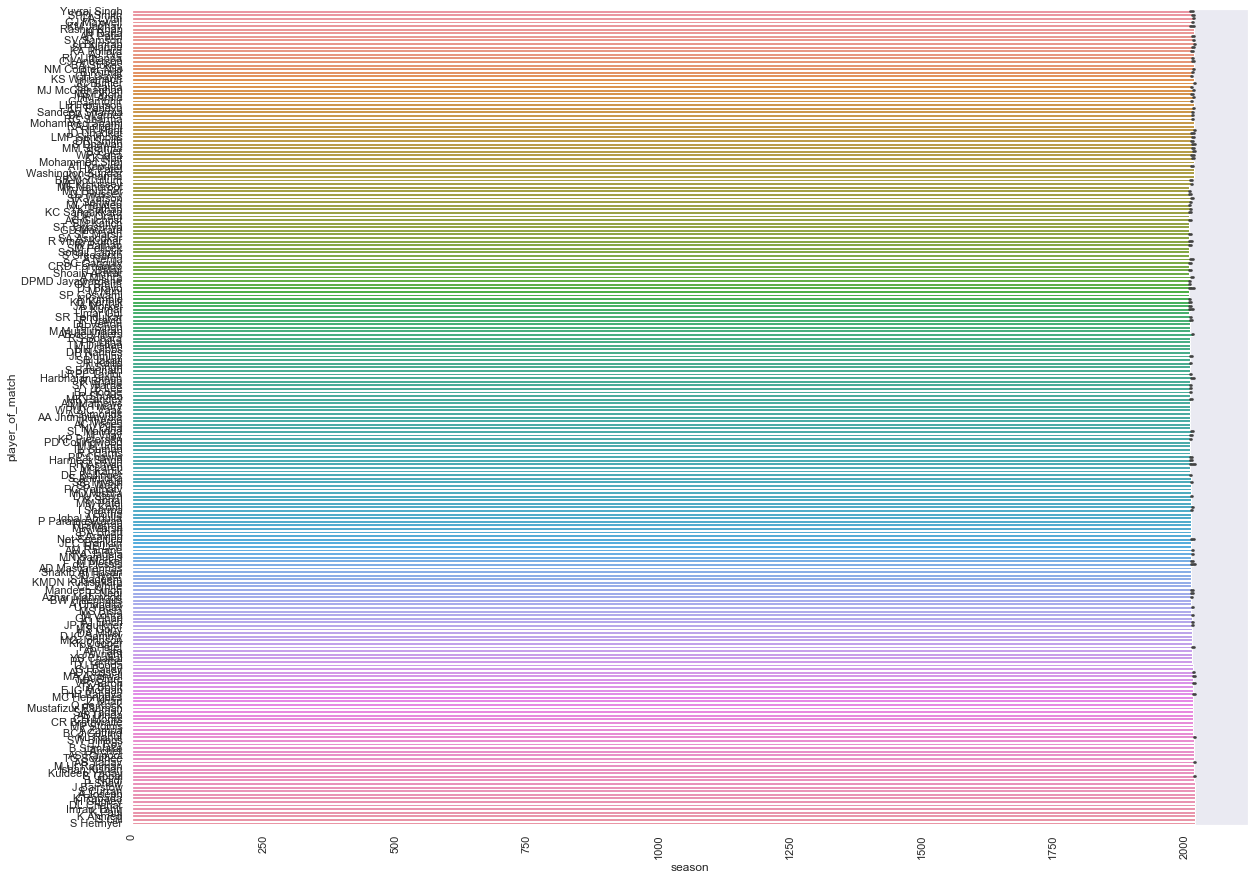

In [98]:
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x='season',y='player_of_match',data=data2)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

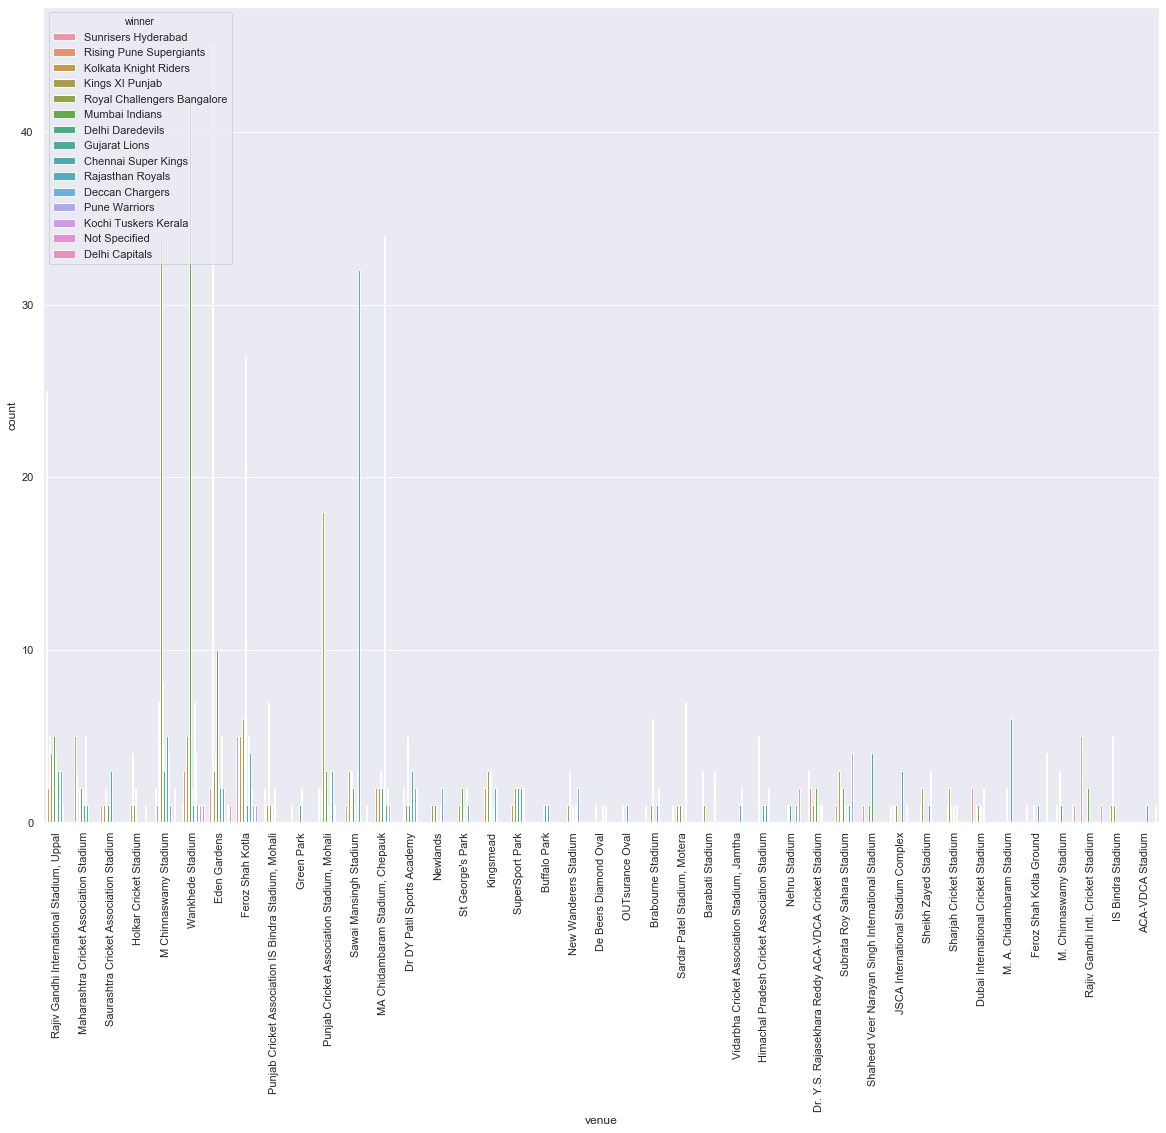

In [99]:
sns.countplot(x='venue',hue ='winner', data=data2)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

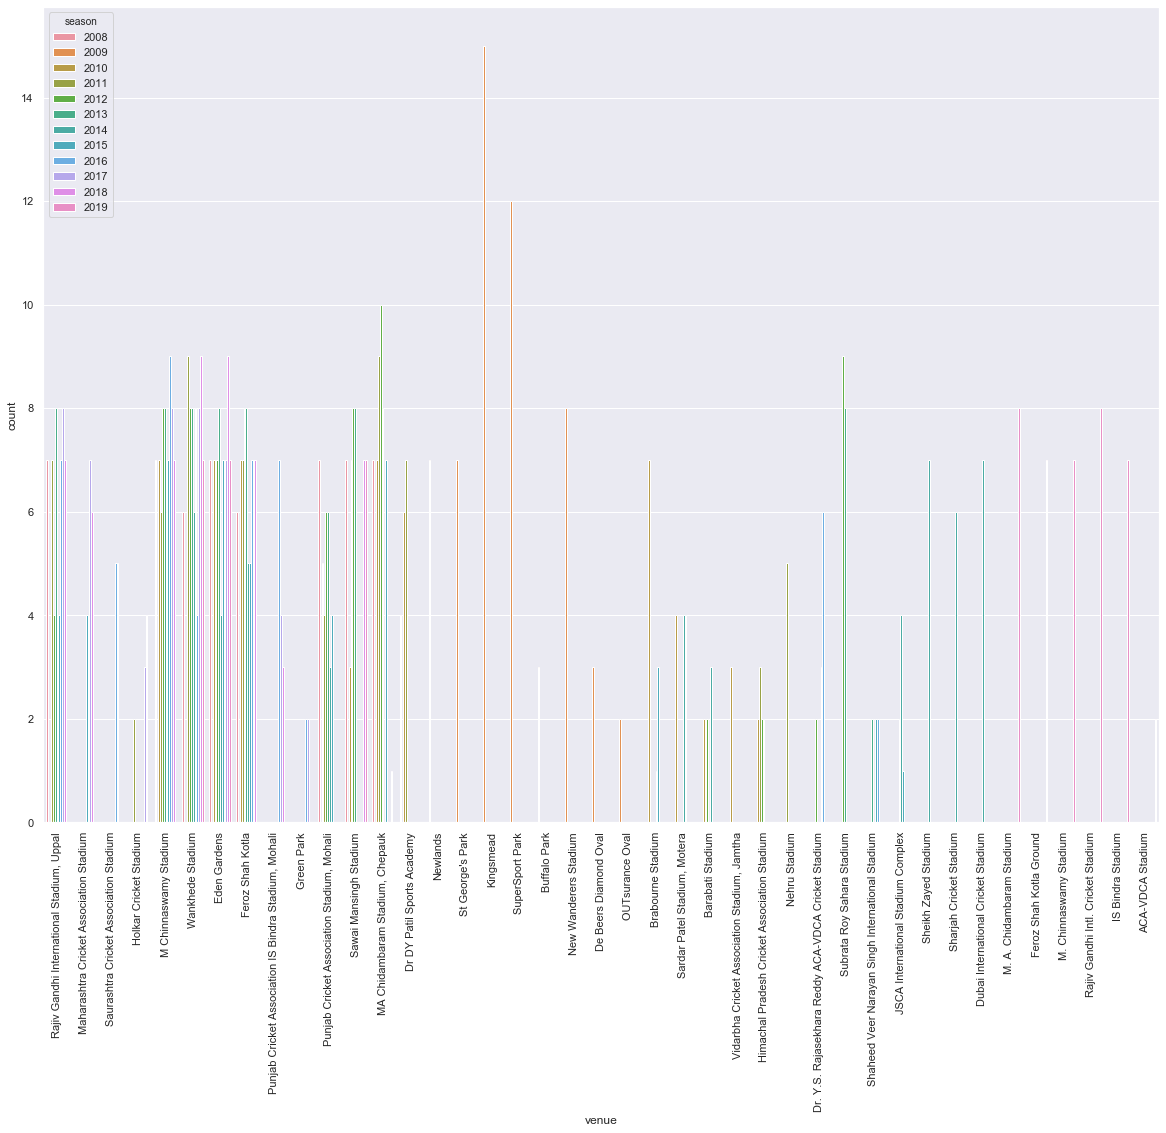

In [100]:
sns.countplot(x='venue',hue ='season', data=data2)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

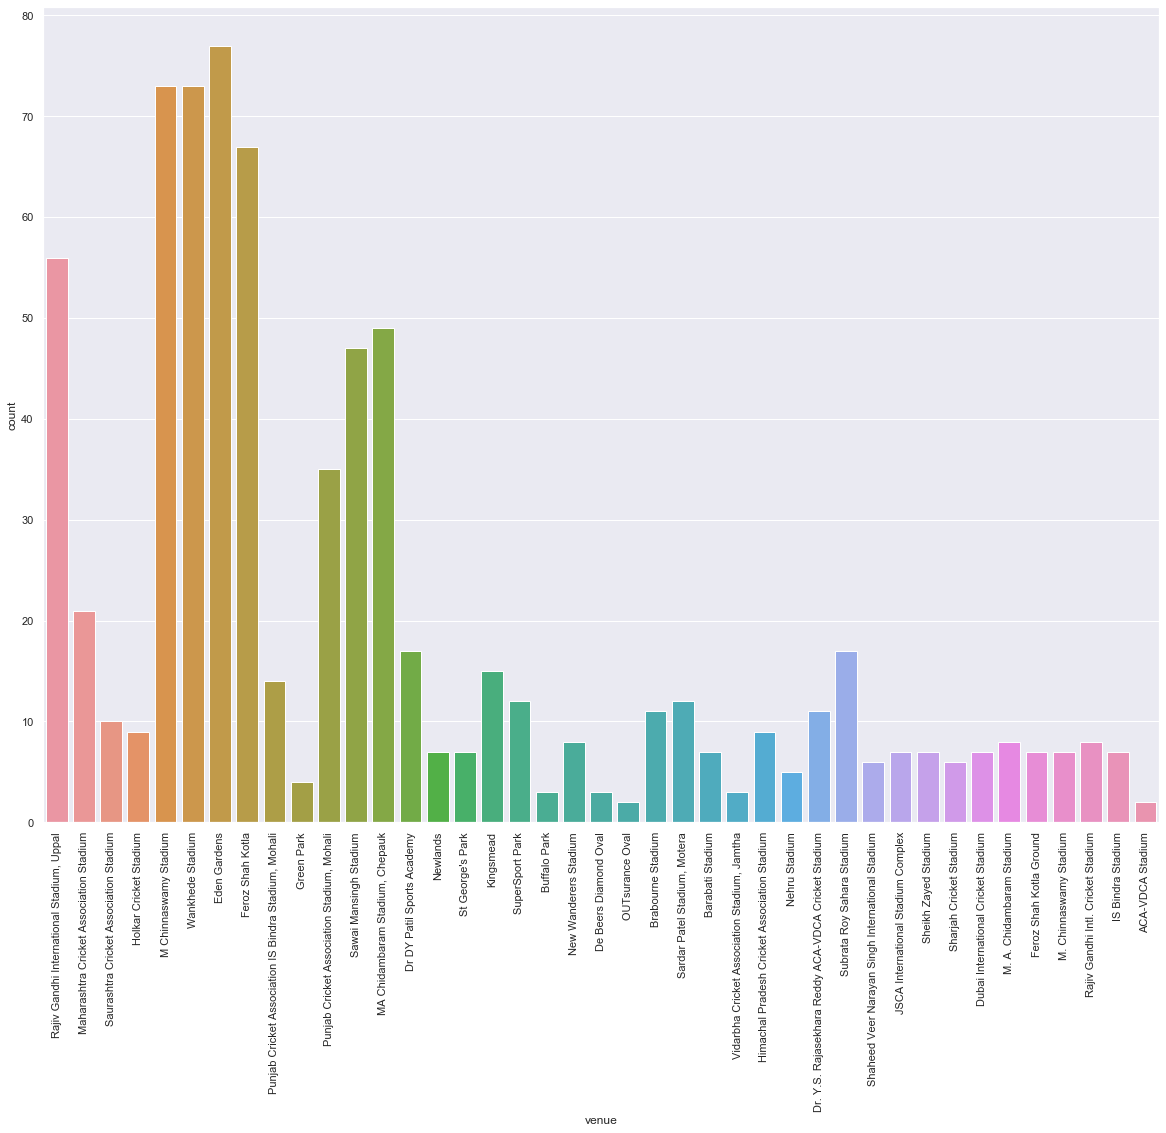

In [101]:
sns.countplot(x='venue', data=data2)
plt.xticks(rotation=90)

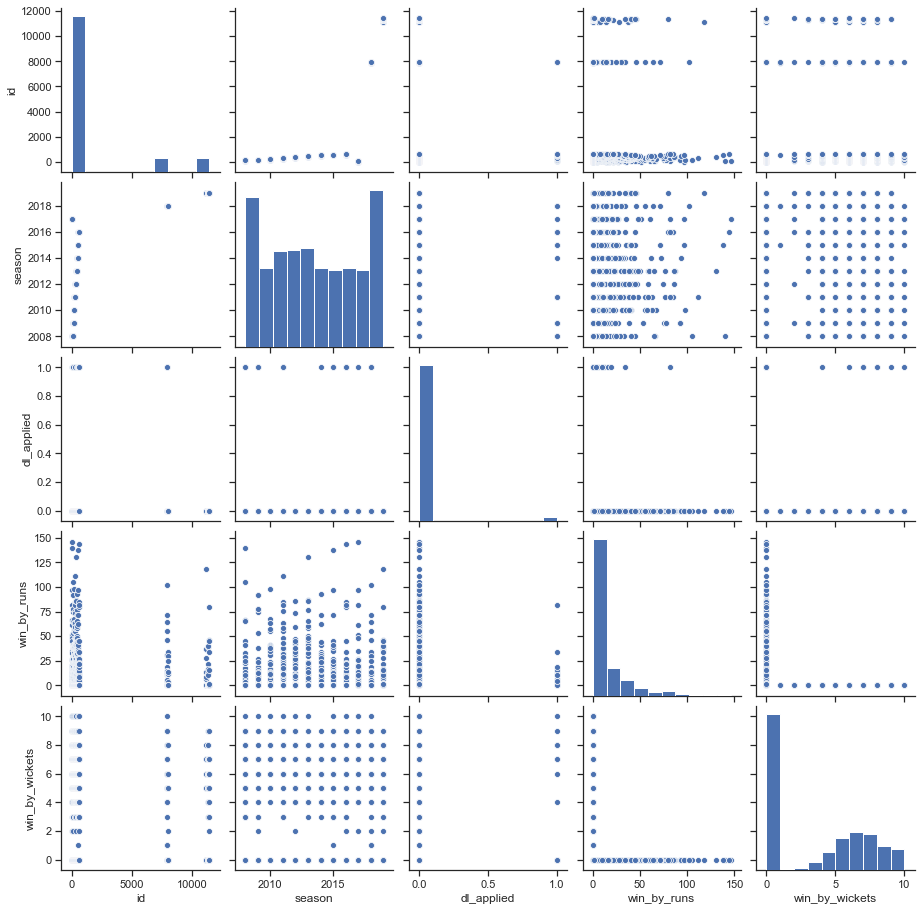

In [103]:
sns.set(style='ticks')
sns.pairplot(data2,palette='husl')